# Task1

In [1]:
import json 
data = []
l= [5,4,3,2,1]
for i in l:  
    file_path = f'./data/datajson/geoLondonSep2022_{i}.json'
    with open(file_path, 'r', encoding='utf-8') as file:
        data += json.load(file)
len(data)

13192

In [2]:
print(data[0])
print("-------------------------------------------------")
print(data[0].keys())

{'_id': 1574488568986320898, 'date': {'$date': '2022-09-26T19:58:22Z'}, 'screen_name': 'Leothebeekeeper', 'qualityScore': 0.609359681372549, 'text': "I came across @thatcherscider #cloudylemon #cider hmmm I'm two minds about this... I'd describe it as a dessert cider sweet alittle like #limoncello # # # #zingy #refreshing @ London, United Kingdom https://t.co/EwQuimrzJl", 'url': 'https://t.co/GsULBNtvKN', 'description': 'Leo The Beekeeper  📍London,UK Urban \n🐝Beekeeper+🍯Entrepreneur 🍴Foodie + 👞🎩Style + Life = lifestyle  \n📸 Instagram \n\nDM for Collaboration/Inquires', 'listed_count': 0, 'user_created': {'$date': '2018-04-30T12:37:29Z'}, 'geo_enabled': True, 'favourites_count': 248, 'coordinates': [-0.1094, 51.5141], 'location': 'London, England', 'followers_count': 115, ' friends_count': 115, 'place_name': 'City of London, London', 'place_country': 'United Kingdom', 'country_code': 'GB', 'place_coordinates': [[[-0.112442, 51.5068], [-0.0733794, 51.5068], [-0.0733794, 51.522161], [-0.1

number of rows is: 59
number of columns is: 48
number of grids is: 2832


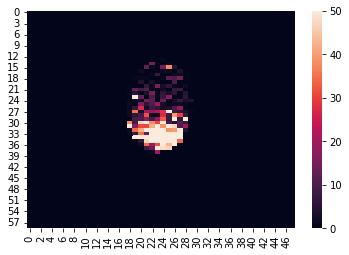

Total number of tweets: 13192
Maximum number of tweets in a single cell: 4404
Minimum number of tweets in a single cell: 1


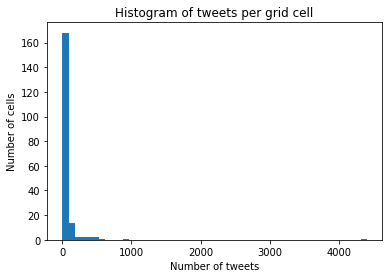

In [3]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Define the coordinates for the bounding box of London
london_bounding_coords = [-0.563, 51.261318, 0.28036, 51.686031]

# Create a function to calculate the distance between two coordinates
# Haversine function definition
def haversine(coord1, coord2):
    # Earth radius in km
    R = 6373.0
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# Function to calculate the grid points based on the bounding coordinates and grid size
def calculate_grid_points(bounding_coords, grid_size_km = 1):
    # Calculate the number of points needed based on the grid size
    num_lon_points = int(haversine([bounding_coords[1], bounding_coords[0]], [bounding_coords[3], bounding_coords[0]]) / grid_size_km)
    num_lat_points = int(haversine([bounding_coords[1], bounding_coords[0]], [bounding_coords[1], bounding_coords[2]]) / grid_size_km)

    
    # Generate the grid points
    lon_points = np.linspace(bounding_coords[0], bounding_coords[2], num_lon_points + 1)
    lat_points = np.linspace(bounding_coords[1], bounding_coords[3], num_lat_points + 1)
    
    return lon_points, lat_points

# Calculate the grid points
lon_points, lat_points = calculate_grid_points(london_bounding_coords)
# Create a grid matrix to hold the count of tweets
grid_matrix = np.zeros((len(lat_points), len(lon_points)))
print(f'number of rows is: {len(lat_points)}')
print(f'number of columns is: {len(lon_points)}')
print(f'number of grids is: {int(len(lat_points) * len(lon_points))}')
# Function to find the grid index for a given coordinate
def get_grid_index(coord):
    lon, lat = coord
    lon_idx = np.searchsorted(lon_points, lon, side='right') - 1
    lat_idx = np.searchsorted(lat_points, lat, side='right') - 1
    return lat_idx, lon_idx

# Read the tweets and organize them into the grid
tweet_counts = {}
for da in data:
    if da.get('geo_enabled', False):
        coord = da['coordinates']
        grid_index = get_grid_index(coord)
        if grid_index in tweet_counts:
            tweet_counts[grid_index] += 1
        else:
            tweet_counts[grid_index] = 1
        grid_matrix[grid_index] += 1
# Now we have tweet counts per grid cell, let's visualize it with a heatmap
sns.heatmap(grid_matrix, vmax=50, vmin=0)
plt.show()

# We can also calculate and print some basic statistics
total_tweets = sum(tweet_counts.values())
max_tweets_in_cell = max(tweet_counts.values())
min_tweets_in_cell = min(tweet_counts.values())

print(f"Total number of tweets: {total_tweets}")
print(f"Maximum number of tweets in a single cell: {max_tweets_in_cell}")
print(f"Minimum number of tweets in a single cell: {min_tweets_in_cell}")

# To further analyze the data, we can plot a histogram of tweets per grid cell
plt.hist(tweet_counts.values(), bins=50)
plt.title('Histogram of tweets per grid cell')
plt.xlabel('Number of tweets')
plt.ylabel('Number of cells')
plt.show()

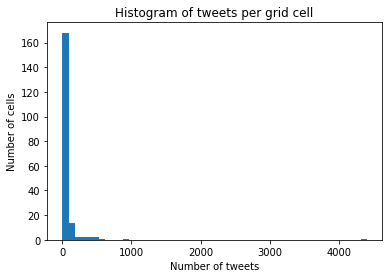

The highest point in the histogram represents 168.0 cells.


In [4]:
n, bins, patches = plt.hist(tweet_counts.values(), bins=50)
plt.title('Histogram of tweets per grid cell')
plt.xlabel('Number of tweets')
plt.ylabel('Number of cells')
plt.show()

max_count = n.max()  # Get the maximum value of the histogram bins
print(f"The highest point in the histogram represents {max_count} cells.")


# Task2

In [5]:
from collections import Counter
import spacy
with open('data/credModelFiles/highQuality.json', 'r',encoding='utf-8') as f:
    Highdata = []
    for line in f.readlines():
        Highdata.append(json.loads(line))
print(len(Highdata),Highdata[0])
with open('data/credModelFiles/lowQuality.json', 'r',encoding='utf-8') as f:
    Lowdata = []
    for line in f.readlines():
        Lowdata.append(json.loads(line))
print(len(Lowdata),Lowdata[0])
with open('data/credModelFiles/bgQuality.json', 'r',encoding='utf-8') as f:
    bgdata = []
    for line in f.readlines():
        bgdata.append(json.loads(line))
print(len(bgdata),bgdata[0])

2501 {'_id': {'$oid': '623cb1491fdfc2cfea3b85c4'}, 'username': 'miguel_zavalaa', 'description': '•Mind with no sense in it•   •Stay away from me ‘cause I’m dancing to quite a different drumbeat•', 'qualityS': 0.6081996434937612, 'text': 'Turisteando (@ Piccadilly Circus in London, Greater London) https://t.co/ear25pmZNc https://t.co/528VOdxIeF'}
1527 {'_id': {'$oid': '623dbef7462d56a90e36b221'}, 'username': 'tobythereactive', 'description': "IG: The_Champagne_Shepherd Model ☀ Influencer ☀ Don't like people", 'qualityS': 0.4662280701754386, 'text': 'Just posted a photo @ London, United Kingdom https://t.co/YZWvowLCj2'}
2239 {'_id': '1613006911946776576', 'text': ['confidence', 'dont', 'fix', 'lost', 'need', 'negative', 'playing', 'right', 'support', 'well'], 'score': 0.6367300158372926}


In [6]:
hq_tweets_text = []
lq_tweets_text = []
bg_tweets_text = []
for tweet in Highdata:
    hq_tweets_text.append(tweet.get('text'))
for tweet in Lowdata:
    lq_tweets_text.append(tweet.get('text'))
for tweet in bgdata:
    bg_tweets_text.append(tweet.get('text'))

print(len(hq_tweets_text),len(lq_tweets_text),len(bg_tweets_text))
hq_tweets_text[0],lq_tweets_text[0],bg_tweets_text[0]

2501 1527 2239


('Turisteando (@ Piccadilly Circus in London, Greater London) https://t.co/ear25pmZNc https://t.co/528VOdxIeF',
 'Just posted a photo @ London, United Kingdom https://t.co/YZWvowLCj2',
 ['confidence',
  'dont',
  'fix',
  'lost',
  'need',
  'negative',
  'playing',
  'right',
  'support',
  'well'])

In [7]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Make sure to download the necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
class NWScore:

    def __init__(self, hq_set: list, lq_set: list,bg_set: list,tweets = None):
        self.lemmatizer = WordNetLemmatizer()
        self.hq_set = hq_set
        self.lq_set = lq_set
        self.bg_set = bg_set
        self.ScoreModel(tweets)

    def ScoreModel(self,tweets):
        self.hq_word_count, self.F_HQ = self.GetWordCount(self.hq_set)
        self.lq_word_count, self.F_LQ = self.GetWordCount(self.lq_set)
        self.bg_word_count, self.F_BG = self.GetWordCount(self.bg_set)
        self.CNTD(tweets)
        
#     def text_pipeline_spacy(self,text):
#         tokens = []
#         doc = nlp(text)
#         for t in doc:
#             if not t.is_stop and  not t.is_punct and  not t.is_space and  not t.like_url: #remove stop word, url, whitespace character, punctuation mark
#                 tokens.append(t.lemma_.lower())
#         return tokens

    def text_pipeline(self, text):
        # Lowercase the text
        text = text.lower()
        # Remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        # Tokenize the text
        tokens = word_tokenize(text)
        # Remove stop words and punctuation, and lemmatize the tokens
        tokens = [
            self.lemmatizer.lemmatize(token) for token in tokens
            if token.isalpha() and token not in stop_words
        ]
        return tokens

#     def preprocess(self,tweets):
#         if type(tweets[0]) == list:
#             return tweets
#         return [self.text_pipeline_spacy(x) for x in tweets]

    def preprocess(self, tweets):
        # Check if the first element of tweets is a list (assuming all elements are of the same type)
        if isinstance(tweets[0], list):
            # If it is a list, assume tweets is a list of list of tokens
            return tweets
        # Otherwise, assume tweets is a list of strings to be tokenized
        return [self.text_pipeline(tweet) for tweet in tweets]
    
    def GetWordCount(self,tweets):
        data_words = self.preprocess(tweets)
        total_length = sum(len(inner_list) for inner_list in data_words)
        counter = Counter()
        for tweet in data_words:
            words = tweet
            for word in words:
                if word != '️':
                    counter[word] += 1
        return counter, total_length

    def CNTD(self,tweets):
        self.data_list = []
        if tweets == None:
            return 
        data_words = self.preprocess(tweets)
        for tweet in data_words:
            self.my_list = []
            sht = 0
            slt = 0
            for term in tweet:
                my_dict = {}
#                 my_dict['text'] = tweet
                my_dict['term'] = term
                if term in self.hq_word_count.keys():
                    tfthq = self.hq_word_count[term]
                else:
                    tfthq = 1
                my_dict['tfthq'] = tfthq
                if term in self.lq_word_count.keys():
                    tftlq = self.lq_word_count[term]
                else:
                    tftlq = 1
                my_dict['tftlq'] = tftlq
                if term in self.bg_word_count.keys():
                    tftbq = self.bg_word_count[term]
                else:
                    tftbq = 1
                my_dict['tftbq'] = tftbq
                rhqt = (tfthq / self.F_HQ) / (tftbq / self.F_BG)
                rlqt = (tftlq / self.F_LQ) / (tftbq / self.F_BG)
                my_dict['rhqt'] = rhqt
                my_dict['rlqt'] = rlqt
                if rhqt >= 2.0:
                    shqt = rhqt
                else:
                    shqt = 0
                my_dict['shqt'] = shqt
                sht += shqt
                if rlqt >= 2.0:
                    slqt = rlqt
                else:
                    slqt = 0 
                my_dict['slqt'] = slqt
                slt += slqt
                self.my_list.append(my_dict)
            nscore = np.log2((1+sht) / (1+slt))
            self.my_list.append(nscore)
            self.data_list.append(self.my_list)
            
    def GetScore(self):
        self.scorelist = []
        for sample in self.data_list:
            self.scorelist.append(sample[-1])
        return self.scorelist
    
s = NWScore(hq_tweets_text,lq_tweets_text,bg_tweets_text,bg_tweets_text)
print(s.hq_word_count.most_common(10))
print("F_Hq:",s.F_HQ,"F_Bg:",s.F_BG,"F_Lq:",s.F_LQ)
score = s.GetScore()
count = 0
for i in score:
    if i > 0:
        count+=1
print("total number of data:",len(score))
print("high quality:",count)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\99264\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\99264\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\99264\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('london', 1565), ('kingdom', 729), ('united', 673), ('photo', 271), ('posted', 262), ('greater', 175), ('new', 128), ('amp', 112), ('day', 105), ('england', 102)]
F_Hq: 24125 F_Bg: 28392 F_Lq: 15523
total number of data: 2239
high quality: 786


In [9]:
s = NWScore(hq_tweets_text,lq_tweets_text,bg_tweets_text,bg_tweets_text)
print("the most common term in high data", s.hq_word_count.most_common(10))
print("the most common term in low data", s.lq_word_count.most_common(10))
print("the most common term in bg data", s.bg_word_count.most_common(10))

print("total number of data:",len(hq_tweets_text),len(lq_tweets_text),len(bg_tweets_text))

the most common term in high data [('london', 1565), ('kingdom', 729), ('united', 673), ('photo', 271), ('posted', 262), ('greater', 175), ('new', 128), ('amp', 112), ('day', 105), ('england', 102)]
the most common term in low data [('mohammed', 856), ('nasser', 791), ('imam', 724), ('almahdicaliphofallah', 706), ('london', 635), ('kingdom', 558), ('united', 516), ('photo', 458), ('posted', 456), ('allaah', 400)]
the most common term in bg data [('new', 211), ('york', 143), ('london', 132), ('like', 130), ('people', 116), ('city', 106), ('manchester', 97), ('time', 94), ('one', 91), ('england', 88)]
total number of data: 2501 1527 2239


In [8]:
high = NWScore(hq_tweets_text,lq_tweets_text,bg_tweets_text,hq_tweets_text)
score = high.GetScore()
count = 0
for i in score:
    if i > 0:
        count+=1
print("total number of data:",len(score))
print("high quality:",count)

total number of data: 2501
high quality: 1648


In [9]:
low = NWScore(hq_tweets_text,lq_tweets_text,bg_tweets_text,lq_tweets_text)
score = low.GetScore()
count = 0
for i in score:
    if i > 0:
        count+=1
print("total number of data:",len(score))
print("high quality:",count)

total number of data: 1527
high quality: 83


In [10]:
bg = NWScore(hq_tweets_text,lq_tweets_text,bg_tweets_text,bg_tweets_text)
score = bg.GetScore()
count = 0
for i in score:
    if i > 0:
        count+=1
print("total number of data:",len(score))
print("high quality:",count)

total number of data: 2239
high quality: 786


# Task3

In [11]:
texts = []
for sample in data:
    texts.append(sample['text'])
print(texts[0])
print("total number of data:",len(texts))

I came across @thatcherscider #cloudylemon #cider hmmm I'm two minds about this... I'd describe it as a dessert cider sweet alittle like #limoncello # # # #zingy #refreshing @ London, United Kingdom https://t.co/EwQuimrzJl
total number of data: 13192


In [12]:
geo = NWScore(hq_tweets_text,lq_tweets_text,bg_tweets_text,texts)
print(geo.hq_word_count.most_common(10))
print("F_Hq:",geo.F_HQ,"F_Bg:",geo.F_BG,"F_Lq:",geo.F_LQ)

[('london', 1565), ('kingdom', 729), ('united', 673), ('photo', 271), ('posted', 262), ('greater', 175), ('new', 128), ('amp', 112), ('day', 105), ('england', 102)]
F_Hq: 24125 F_Bg: 28392 F_Lq: 15523


In [13]:
score = geo.GetScore()
count_high = 0
count_zero = 0
for i in score:
    if i > 0:
        count_high+=1
    elif i == 0:
        count_zero += 1

In [14]:
print("total number of data:",len(score))
print("The number of high quality:",count_high)
print("The number remove is:",len(score) - count_high - count_zero)
print("The number of bg:", count_zero)

total number of data: 13192
The number of high quality: 5298
The number remove is: 7716
The number of bg: 178


In [15]:
positive_indices = [index for index, number in enumerate(score) if number > 0]
print(len(positive_indices))
positive_tweets_path = './data/positive_tweets.json'
def write_specific_lines(data, indices,positive_tweets_path):
    # Read the original data line by line and collect the lines with the specified indices
    lines_to_write = []
    for i, line in enumerate(data):
        if i in indices:
            lines_to_write.append(line)
    
    # Write the collected lines to the new file
    with open(positive_tweets_path, 'w', encoding='utf-8') as file:
        json.dump(lines_to_write, file, ensure_ascii=False, indent=4)

write_specific_lines(data, positive_indices, positive_tweets_path)

5298


In [27]:
geo.data_list[0]

[{'term': 'came',
  'tfthq': 1,
  'tftlq': 1,
  'tftbq': 2,
  'rhqt': 0.5884352331606219,
  'rlqt': 0.9145139470463184,
  'shqt': 0,
  'slqt': 0},
 {'term': 'across',
  'tfthq': 1,
  'tftlq': 1,
  'tftbq': 16,
  'rhqt': 0.07355440414507773,
  'rlqt': 0.1143142433807898,
  'shqt': 0,
  'slqt': 0},
 {'term': 'thatcherscider',
  'tfthq': 1,
  'tftlq': 1,
  'tftbq': 1,
  'rhqt': 1.1768704663212437,
  'rlqt': 1.8290278940926368,
  'shqt': 0,
  'slqt': 0},
 {'term': 'cloudylemon',
  'tfthq': 1,
  'tftlq': 1,
  'tftbq': 1,
  'rhqt': 1.1768704663212437,
  'rlqt': 1.8290278940926368,
  'shqt': 0,
  'slqt': 0},
 {'term': 'cider',
  'tfthq': 1,
  'tftlq': 1,
  'tftbq': 1,
  'rhqt': 1.1768704663212437,
  'rlqt': 1.8290278940926368,
  'shqt': 0,
  'slqt': 0},
 {'term': 'hmmm',
  'tfthq': 1,
  'tftlq': 1,
  'tftbq': 1,
  'rhqt': 1.1768704663212437,
  'rlqt': 1.8290278940926368,
  'shqt': 0,
  'slqt': 0},
 {'term': 'two',
  'tfthq': 13,
  'tftlq': 2,
  'tftbq': 28,
  'rhqt': 0.5464041450777202,
  'rl

In [17]:
score = geo.GetScore()

score_array = np.array(score)
sorted_indices = np.argsort(score_array)
sorted_scores = score_array[sorted_indices]


print("sorted index:", sorted_indices)
print("sorted score:", sorted_scores)

for i,j in enumerate(sorted_scores):
    if j >0:
        positive_index = i
        print("the index positive:",i)
        break
for i,j in enumerate(sorted_scores):
    if j ==0:
        negative_index = i
        print("the index negative:",i)
        break

ave_p = sum(sorted_scores[positive_index:])/(len(sorted_scores)-positive_index)
ave_n = sum(sorted_scores[0:negative_index])/negative_index
print("average score in positive:", ave_p)
print("average score in negative:", ave_n)

for i,j in enumerate(sorted_scores):
    if j >ave_p:
        print("the index of high quality:",i)
        break
for i,j in enumerate(sorted_scores):
    if j >ave_n:
        print("the index of low quality:",i)
        break
        
indices_positive = sorted_indices[10629:]
print(indices_positive)
indices_negative = sorted_indices[0:2675]
print(indices_negative)

sorted index: [10613  8671  5646 ...  1216  1201  1207]
sorted score: [-4.91955205 -4.34962682 -4.34962682 ...  7.46283896  7.46283896
  7.46283896]
the index positive: 7894
the index negative: 7716
average score in positive: 2.167708041892816
average score in negative: -0.7562690788116231
the index of high quality: 10629
the index of low quality: 2675
[4115 9377 4738 ... 1216 1201 1207]
[10613  8671  5646 ...  8930  7117 11023]


In [18]:
positive_tweets_path = './data/temp_negative.json'
def write_specific_lines(data, indices,positive_tweets_path):
    # Read the original data line by line and collect the lines with the specified indices
    lines_to_write = []
    for i, line in enumerate(data):
        if i in indices:
            lines_to_write.append(line)
    
    # Write the collected lines to the new file
    with open(positive_tweets_path, 'w', encoding='utf-8') as file:
        json.dump(lines_to_write, file, ensure_ascii=False, indent=4)

write_specific_lines(data, indices_negative, positive_tweets_path)

In [19]:
positive_tweets_path = './data/temp_positive.json'
def write_specific_lines(data, indices,positive_tweets_path):
    # Read the original data line by line and collect the lines with the specified indices
    lines_to_write = []
    for i, line in enumerate(data):
        if i in indices:
            lines_to_write.append(line)
    
    # Write the collected lines to the new file
    with open(positive_tweets_path, 'w', encoding='utf-8') as file:
        json.dump(lines_to_write, file, ensure_ascii=False, indent=4)

write_specific_lines(data, indices_positive, positive_tweets_path)

In [20]:
print("total number of data:",len(score))
print("The number of high quality:",len(indices_positive))
print("The number remove is:",len(indices_negative))
print("The number of bg:", len(score) - len(indices_positive) - len(indices_negative))

total number of data: 13192
The number of high quality: 2563
The number remove is: 2675
The number of bg: 7954


In [21]:
with open('data/positive_tweets.json', 'r',encoding='utf-8') as f:
    data2 = json.load(f)
    
print(len(data2),data2[0])

5298 {'_id': 1574486764064063499, 'date': {'$date': '2022-09-26T19:51:11Z'}, 'screen_name': 'trafficgifs', 'qualityScore': 0.5692307692307693, 'text': 'Stockwell Road By Clapham Road https://t.co/D6vuQFMamS', 'url': None, 'description': '🚗🚗🚗🚗🚗 bot by @fitnr', 'listed_count': 35, 'user_created': {'$date': '2016-06-23T16:22:55Z'}, 'geo_enabled': True, 'favourites_count': 1, 'coordinates': [-0.12219, 51.472], 'location': 'New York, NY', 'followers_count': 1292, ' friends_count': 1292, 'place_name': 'Lambeth, London', 'place_country': 'United Kingdom', 'country_code': 'GB', 'place_coordinates': [[[-0.15191, 51.410792], [-0.078902, 51.410792], [-0.078902, 51.509887], [-0.15191, 51.509887]]], 'hashtags': [], 'mentions': [], 'source': 'everybot'}


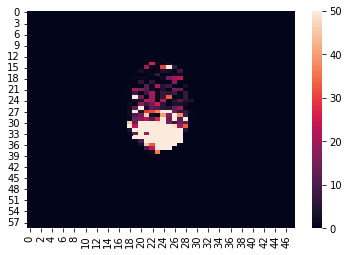

Total number of tweets: 5298
Maximum number of tweets in a single cell: 583
Minimum number of tweets in a single cell: 1


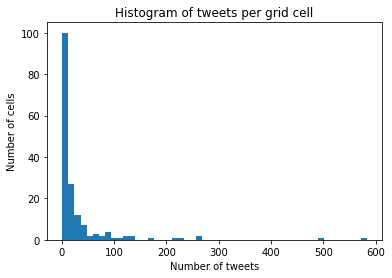

In [22]:
# Read the tweets and organize them into the grid
tweet_counts = {}
for da in data2:
    if da.get('geo_enabled', False):
        coord = da['coordinates']
        grid_index = get_grid_index(coord)
        if grid_index in tweet_counts:
            tweet_counts[grid_index] += 1
        else:
            tweet_counts[grid_index] = 1
        grid_matrix[grid_index] += 1
# Now we have tweet counts per grid cell, let's visualize it with a heatmap
sns.heatmap(grid_matrix, vmax=50, vmin=0)
plt.show()

# We can also calculate and print some basic statistics
total_tweets = sum(tweet_counts.values())
max_tweets_in_cell = max(tweet_counts.values())
min_tweets_in_cell = min(tweet_counts.values())

print(f"Total number of tweets: {total_tweets}")
print(f"Maximum number of tweets in a single cell: {max_tweets_in_cell}")
print(f"Minimum number of tweets in a single cell: {min_tweets_in_cell}")

# To further analyze the data, we can plot a histogram of tweets per grid cell
plt.hist(tweet_counts.values(), bins=50)
plt.title('Histogram of tweets per grid cell')
plt.xlabel('Number of tweets')
plt.ylabel('Number of cells')
plt.show()


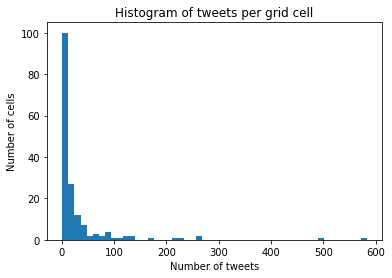

The highest point in the histogram represents 100.0 cells.


In [23]:
n, bins, patches = plt.hist(tweet_counts.values(), bins=50)
plt.title('Histogram of tweets per grid cell')
plt.xlabel('Number of tweets')
plt.ylabel('Number of cells')
plt.show()

max_count = n.max()  # Get the maximum value of the histogram bins
print(f"The highest point in the histogram represents {max_count} cells.")


In [24]:
with open('data/temp_positive.json', 'r',encoding='utf-8') as f:
    data3 = json.load(f)
    
print(len(data3),data3[0])

2563 {'_id': 1574486764064063499, 'date': {'$date': '2022-09-26T19:51:11Z'}, 'screen_name': 'trafficgifs', 'qualityScore': 0.5692307692307693, 'text': 'Stockwell Road By Clapham Road https://t.co/D6vuQFMamS', 'url': None, 'description': '🚗🚗🚗🚗🚗 bot by @fitnr', 'listed_count': 35, 'user_created': {'$date': '2016-06-23T16:22:55Z'}, 'geo_enabled': True, 'favourites_count': 1, 'coordinates': [-0.12219, 51.472], 'location': 'New York, NY', 'followers_count': 1292, ' friends_count': 1292, 'place_name': 'Lambeth, London', 'place_country': 'United Kingdom', 'country_code': 'GB', 'place_coordinates': [[[-0.15191, 51.410792], [-0.078902, 51.410792], [-0.078902, 51.509887], [-0.15191, 51.509887]]], 'hashtags': [], 'mentions': [], 'source': 'everybot'}


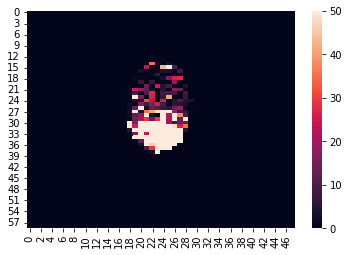

Total number of tweets: 2563
Maximum number of tweets in a single cell: 161
Minimum number of tweets in a single cell: 1


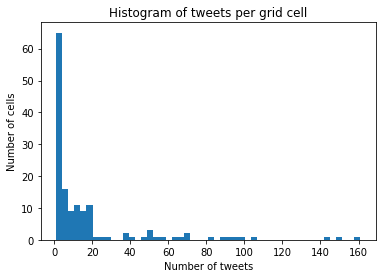

In [25]:
# Read the tweets and organize them into the grid
tweet_counts = {}
for da in data3:
    if da.get('geo_enabled', False):
        coord = da['coordinates']
        grid_index = get_grid_index(coord)
        if grid_index in tweet_counts:
            tweet_counts[grid_index] += 1
        else:
            tweet_counts[grid_index] = 1
        grid_matrix[grid_index] += 1
# Now we have tweet counts per grid cell, let's visualize it with a heatmap
sns.heatmap(grid_matrix, vmax=50, vmin=0)
plt.show()

# We can also calculate and print some basic statistics
total_tweets = sum(tweet_counts.values())
max_tweets_in_cell = max(tweet_counts.values())
min_tweets_in_cell = min(tweet_counts.values())

print(f"Total number of tweets: {total_tweets}")
print(f"Maximum number of tweets in a single cell: {max_tweets_in_cell}")
print(f"Minimum number of tweets in a single cell: {min_tweets_in_cell}")

# To further analyze the data, we can plot a histogram of tweets per grid cell
plt.hist(tweet_counts.values(), bins=50)
plt.title('Histogram of tweets per grid cell')
plt.xlabel('Number of tweets')
plt.ylabel('Number of cells')
plt.show()

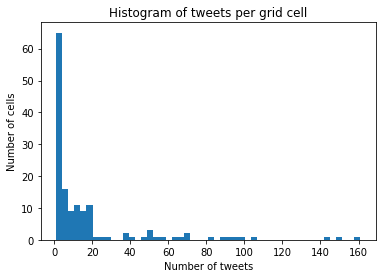

The highest point in the histogram represents 65.0 cells.


In [26]:
n, bins, patches = plt.hist(tweet_counts.values(), bins=50)
plt.title('Histogram of tweets per grid cell')
plt.xlabel('Number of tweets')
plt.ylabel('Number of cells')
plt.show()

max_count = n.max()  # Get the maximum value of the histogram bins
print(f"The highest point in the histogram represents {max_count} cells.")
